In [1]:
%matplotlib notebook


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [3]:
life_expectancy_file = "Resources/life_expectancy.csv"
life_expectancy = pd.read_csv(life_expectancy_file)
life_expectancy.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662,66.074,66.444,66.787,67.113,67.435,...,74.576,74.725,74.872,75.016,75.158,75.299,75.440,75.582,75.725,75.867
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.292,32.742,33.185,33.624,34.060,34.495,...,59.694,60.243,60.754,61.226,61.666,62.086,62.494,62.895,63.288,63.673
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,33.251,33.573,33.914,34.272,34.645,35.031,...,55.096,56.189,57.231,58.192,59.042,59.770,60.373,60.858,61.241,61.547
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.279,63.298,64.187,64.911,65.461,65.848,...,75.656,75.943,76.281,76.652,77.031,77.389,77.702,77.963,78.174,78.345
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
life_expectancy_2016 = life_expectancy[['Country Name', '2016']]
life_expectancy_2016.count()


Country Name    264
2016            245
dtype: int64

In [5]:
life_expectancy_2016=life_expectancy_2016.dropna(how='any')
life_expectancy_2016.count()

Country Name    245
2016            245
dtype: int64

In [13]:
top_life_expectancy_2016 = life_expectancy_2016.sort_values(by='2016', ascending=False)
top_life_expectancy_2016 = top_life_expectancy_2016.set_index("Country Name")
top_life_expectancy_2016 = top_life_expectancy_2016.rename(columns={'2016': 'Life Expectancy'})
top_life_expectancy_2016.head()

,Life Expectancy
Country Name,
"Hong Kong SAR, China",84.226829
Japan,83.984878
"Macao SAR, China",83.849000
Switzerland,82.897561
Spain,82.831707


In [7]:
bottom_life_expectancy_2016 = life_expectancy_2016.sort_values(by='2016', ascending=True)
bottom_life_expectancy_2016 = bottom_life_expectancy_2016.set_index("Country Name")
bottom_life_expectancy_2016 = bottom_life_expectancy_2016.rename(columns={'2016': 'Life Expectancy'})
bottom_life_expectancy_2016.head()

,Life Expectancy
Country Name,
Sierra Leone,51.835
Central African Republic,52.171
Chad,52.903
Nigeria,53.428
Cote d'Ivoire,53.582


<IPython.core.display.Javascript object>


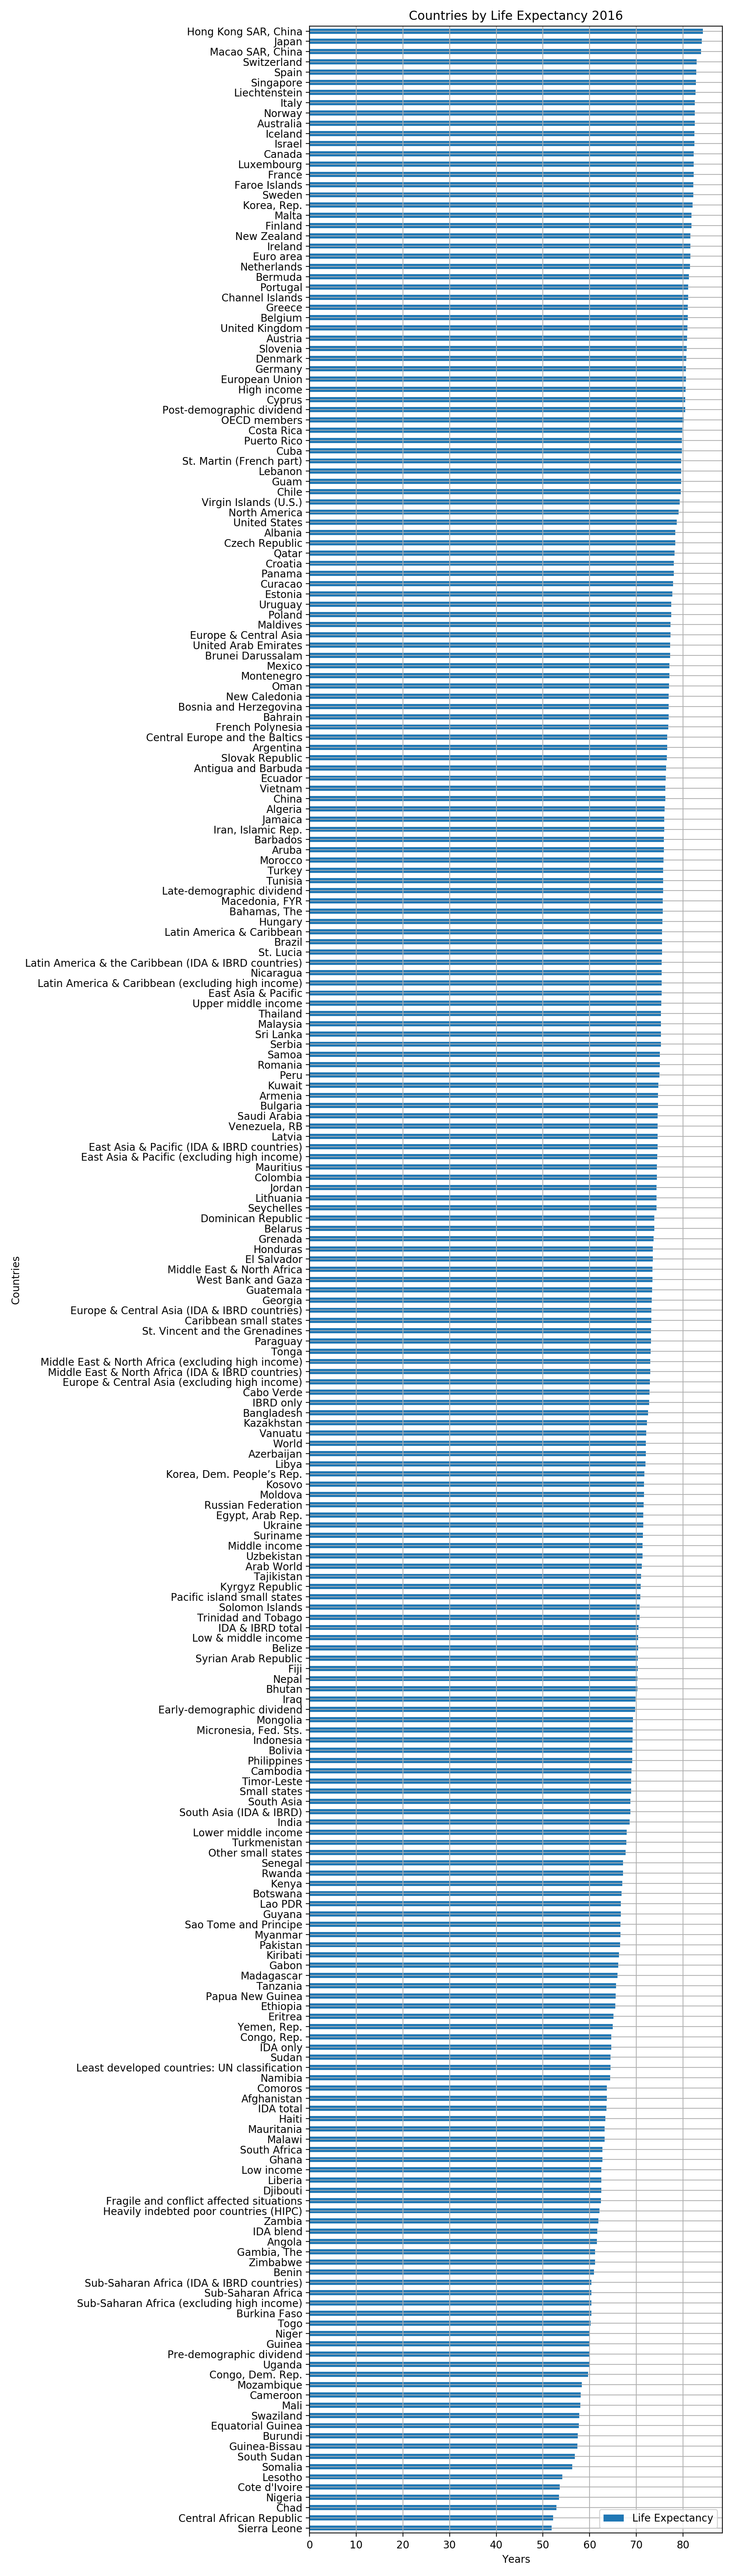

In [8]:
bottom_life_expectancy_2016.plot(kind="barh", figsize=(10,35))

plt.title("Countries by Life Expectancy 2016")
plt.xlabel("Years")
plt.ylabel("Countries")
plt.grid()

plt.show()
plt.tight_layout()

In [9]:
average_changes = pd.DataFrame(life_expectancy.mean())

In [10]:
years = average_changes.index.tolist()
int_years = list(map(int, years))

average = average_changes[0].tolist()

In [11]:
x_axis = np.array(int_years)
y = np.array(average)

<IPython.core.display.Javascript object>


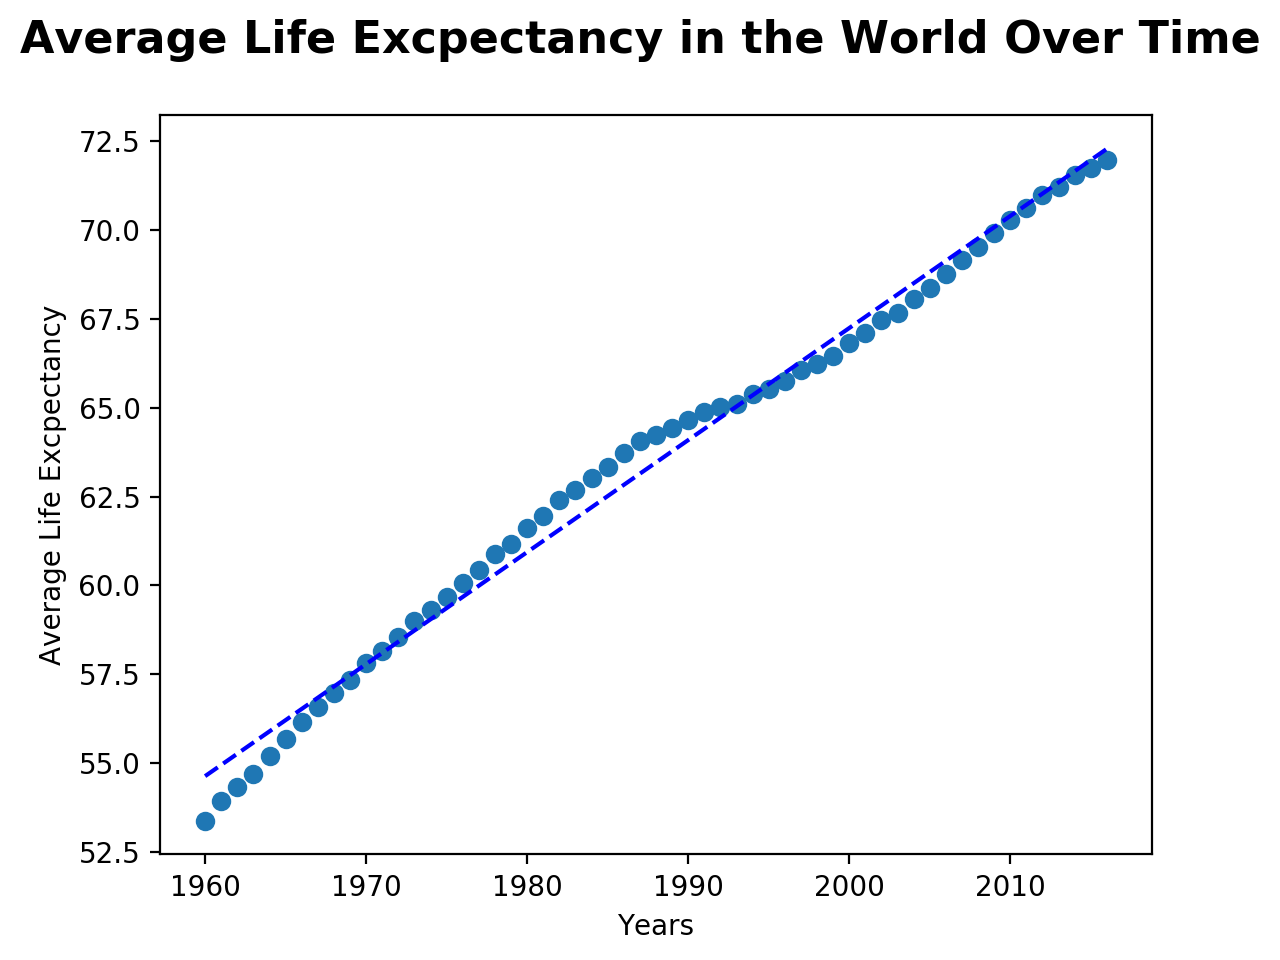

In [12]:
(slope, intercept, _, _, _) = linregress(x_axis,y)
fit = slope * x_axis + intercept

fig, ax = plt.subplots()

fig.suptitle("Average Life Excpectancy in the World Over Time", fontsize=16, fontweight="bold")

ax.set_xlabel("Years")
ax.set_ylabel("Average Life Excpectancy")

ax.plot(x_axis, average_changes[0], linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.show()